In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression



print("Libraries Loaded")


Libraries Loaded


In [2]:
df = pd.read_csv("fund_data.csv")
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'fund_data.csv'

In [3]:
import os
os.getcwd()



'/home/suyash'

In [4]:
df = pd.read_csv("fund_data.csv")
df.head()



,FundName,MarketCap,Type,Risk,SharpeRatio,1YrReturn%,3YrReturn%
0,Alpha Equity Fund,Large,Equity,High,1.2,18.5,14.2
1,Bluechip Growth Fund,Large,Equity,Moderate,1.0,15.3,12.8
2,Midcap Opportunities,Mid,Equity,High,1.4,22.1,17.6
3,Balanced Advantage,Large,Hybrid,Moderate,0.9,12.4,10.1
4,Smallcap Discovery,Small,Equity,High,1.6,28.3,21.4


In [5]:
# Drop rows with missing critical values
df = df.dropna(subset=['MarketCap', 'Type', 'Risk', '3YrReturn%', 'SharpeRatio', '1YrReturn%'])

# Convert percentage columns to numeric
df['3YrReturn%'] = pd.to_numeric(df['3YrReturn%'], errors='coerce')
df['1YrReturn%'] = pd.to_numeric(df['1YrReturn%'], errors='coerce')


In [6]:
grouped = (
    df.groupby(['MarketCap', 'Type', 'Risk'])['3YrReturn%']
    .mean()
    .reset_index()
)

# Find best combination
best_combo = grouped.loc[grouped['3YrReturn%'].idxmax()]
print("Best Combination for 3Yr Return:\n", best_combo)


Best Combination for 3Yr Return:
 MarketCap      Small
Type          Equity
Risk            High
3YrReturn%     23.05
Name: 7, dtype: object


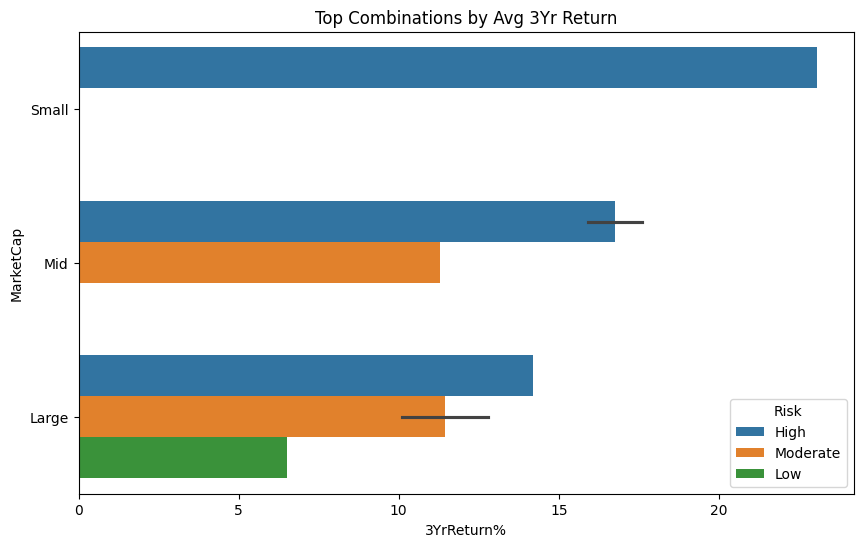

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=grouped.sort_values('3YrReturn%', ascending=False).head(10),
    x='3YrReturn%',
    y='MarketCap',
    hue='Risk'
)
plt.title("Top Combinations by Avg 3Yr Return")
plt.show()


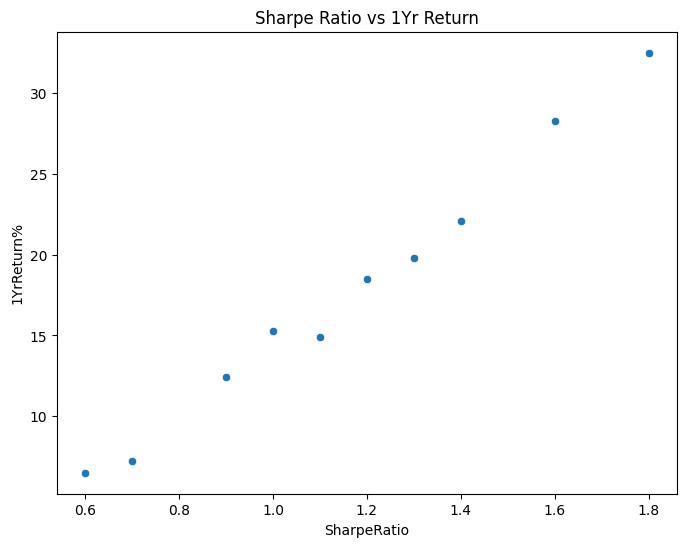

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='SharpeRatio', y='1YrReturn%')
plt.title("Sharpe Ratio vs 1Yr Return")
plt.show()


In [11]:
X = df[['SharpeRatio']]
y = df['1YrReturn%']

# Polynomial regression (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False
